## Project Resultados do Brasileirão 2022

In [158]:
# importando pacotes
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np

### Buscando Dados dos Resultados do Brasileirão

In [159]:
# CARREGANDO AS BIBLIOTECAS
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

# URL PrincipaL do Projeto
url2 = 'https://fbref.com/en/comps/24/schedule/Serie-A-Scores-and-Fixtures'

In [160]:
# COLETANDO O HTML
html = urlopen(url2)
        
# CRIANDO O BEAUTIFUL SOUP APARTIR DO HTML
soup = BeautifulSoup(html, features="lxml")

In [161]:
# CRIANDO O CABEÇALHO - HEADERS2
headers = [th.getText() for th in soup.findAll('th')]
print(headers)
headers2 = headers[1:14]
print(headers2)

['Wk', 'Day', 'Date', 'Time', 'Home', 'xG', 'Score', 'xG', 'Away', 'Attendance', 'Venue', 'Referee', 'Match Report', 'Notes', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '', '4', '', '3', '3', '3', '3', '3', '3', '3', '3', '3', '', '4', '4', '4', '4', '4', '4', '4', '4', '4', '', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '', '7', '', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '', '7', '7', '7', '7', '7', '7', '7', '7', '7', '', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '', '3', '', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '', '14', '14', '14', '14', '14', '14', '14', '14', '14', '14', '', '15', '15', '15', '15', '15', '15', '15', '15', '15', '1

In [162]:
# CRIANDO AS CABEÇALHO - HEADERS2
rows = soup.findAll('tr')[1:]
rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

rows_data

[['Sat',
  '2022-04-09',
  '16:30 ',
  'Fluminense',
  '1.6',
  '0–0',
  '0.1',
  'Santos',
  '22,855',
  'Estadio Jornalista Mário Filho',
  'Anderson Daronco',
  'Match Report',
  ''],
 ['Sat',
  '2022-04-09',
  '19:00 ',
  'Atl Goianiense',
  '1.4',
  '1–1',
  '1.2',
  'Flamengo',
  '10,496',
  'Estádio Antônio Accioly',
  'Braulio da Silva Machado',
  'Match Report',
  ''],
 ['Sun',
  '2022-04-10',
  '11:00 ',
  'Coritiba',
  '1.7',
  '3–0',
  '0.4',
  'Goiás',
  '17,788',
  'Estádio Major Antônio Couto Pereira',
  'Raphael Claus',
  'Match Report',
  ''],
 ['Sun',
  '2022-04-10',
  '16:00 ',
  'Atlético Mineiro',
  '1.9',
  '2–0',
  '0.6',
  'Internacional',
  '37,531',
  'Estádio Governador Magalhães Pinto',
  'Bruno Arleu de Araujo',
  'Match Report',
  ''],
 ['Sun',
  '2022-04-10',
  '16:00 ',
  'Botafogo (RJ)',
  '1.5',
  '1–3',
  '2.1',
  'Corinthians',
  '36,898',
  'Estádio Nilton Santos',
  'Wilton Sampaio',
  'Match Report',
  ''],
 ['Sun',
  '2022-04-10',
  '18:00 ',
  '

In [163]:
# CRIANDO UM DATAFRAME
mydata = pd.DataFrame(rows_data, columns = headers2)
mydata.head(5)

,Day,Date,Time,Home,xG,Score,xG,Away,Attendance,Venue,Referee,Match Report,Notes
0,Sat,2022-04-09,16:30,Fluminense,1.6,0–0,0.1,Santos,"22,855",Estadio Jornalista Mário Filho,Anderson Daronco,Match Report,
1,Sat,2022-04-09,19:00,Atl Goianiense,1.4,1–1,1.2,Flamengo,"10,496",Estádio Antônio Accioly,Braulio da Silva Machado,Match Report,
2,Sun,2022-04-10,11:00,Coritiba,1.7,3–0,0.4,Goiás,"17,788",Estádio Major Antônio Couto Pereira,Raphael Claus,Match Report,
3,Sun,2022-04-10,16:00,Atlético Mineiro,1.9,2–0,0.6,Internacional,"37,531",Estádio Governador Magalhães Pinto,Bruno Arleu de Araujo,Match Report,
4,Sun,2022-04-10,16:00,Botafogo (RJ),1.5,1–3,2.1,Corinthians,"36,898",Estádio Nilton Santos,Wilton Sampaio,Match Report,


In [164]:
# ACRESCENTANDO O VALOR - NUMERO RODADA
val_rodada = [th.getText() for th in soup.findAll('th')][14:]
val_rodada

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '',
 '4',
 '',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '',
 '7',
 '',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '',
 '3',
 '',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '',
 '15',
 '15',
 '15',
 '15

In [165]:
# CRIANDO O CABEÇALHO - TITULO
titulo = ['Rodada']
titulo

mydata2 = pd.DataFrame(val_rodada, columns = titulo)
mydata2

,Rodada
0,1
1,1
2,1
3,1
4,1
...,...
417,38
418,38
419,38
420,38


In [166]:
mydata3 = pd.concat([mydata, mydata2], axis = 1)
mydata3

,Day,Date,Time,Home,xG,Score,xG,Away,Attendance,Venue,Referee,Match Report,Notes,Rodada
0,Sat,2022-04-09,16:30,Fluminense,1.6,0–0,0.1,Santos,"22,855",Estadio Jornalista Mário Filho,Anderson Daronco,Match Report,,1
1,Sat,2022-04-09,19:00,Atl Goianiense,1.4,1–1,1.2,Flamengo,"10,496",Estádio Antônio Accioly,Braulio da Silva Machado,Match Report,,1
2,Sun,2022-04-10,11:00,Coritiba,1.7,3–0,0.4,Goiás,"17,788",Estádio Major Antônio Couto Pereira,Raphael Claus,Match Report,,1
3,Sun,2022-04-10,16:00,Atlético Mineiro,1.9,2–0,0.6,Internacional,"37,531",Estádio Governador Magalhães Pinto,Bruno Arleu de Araujo,Match Report,,1
4,Sun,2022-04-10,16:00,Botafogo (RJ),1.5,1–3,2.1,Corinthians,"36,898",Estádio Nilton Santos,Wilton Sampaio,Match Report,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Sun,2022-11-13,16:00,Bragantino,0.9,0–1,0.6,Fluminense,,Estádio Nabi Abi Chedid,Bruno Arleu de Araujo,Match Report,,38
418,Sun,2022-11-13,16:00,América (MG),2.1,1–1,0.5,Atl Goianiense,,Estádio Raimundo Sampaio,Leandro Pedro Vuaden,Match Report,,38
419,Sun,2022-11-13,16:00,Goiás,0.2,0–4,1.7,São Paulo,,Estádio de Hailé Pinheiro,Marcelo de Lima Henrique,Match Report,,38
420,Sun,2022-11-13,16:00,Internacional,1.4,3–0,1.3,Palmeiras,,Estádio José Pinheiro Borba,Bruno Arleu de Araujo,Match Report,,38


In [167]:
mydata3.drop(columns=['Match Report','Notes'], inplace = True)
mydata3.head(20)

,Day,Date,Time,Home,xG,Score,xG,Away,Attendance,Venue,Referee,Rodada
0,Sat,2022-04-09,16:30,Fluminense,1.6,0–0,0.1,Santos,"22,855",Estadio Jornalista Mário Filho,Anderson Daronco,1
1,Sat,2022-04-09,19:00,Atl Goianiense,1.4,1–1,1.2,Flamengo,"10,496",Estádio Antônio Accioly,Braulio da Silva Machado,1
2,Sun,2022-04-10,11:00,Coritiba,1.7,3–0,0.4,Goiás,"17,788",Estádio Major Antônio Couto Pereira,Raphael Claus,1
3,Sun,2022-04-10,16:00,Atlético Mineiro,1.9,2–0,0.6,Internacional,"37,531",Estádio Governador Magalhães Pinto,Bruno Arleu de Araujo,1
4,Sun,2022-04-10,16:00,Botafogo (RJ),1.5,1–3,2.1,Corinthians,"36,898",Estádio Nilton Santos,Wilton Sampaio,1
5,Sun,2022-04-10,18:00,Fortaleza,1.4,0–1,0.4,Cuiabá,"18,279",Estádio Castelão,Felipe Fernandes de Lima,1
6,Sun,2022-04-10,19:00,Avaí,1.0,1–0,0.3,América (MG),"5,081",Estádio Aderbal Ramos da Silva,Luiz Flávio de Oliveira,1
7,Sun,2022-04-10,19:00,São Paulo,1.6,4–0,0.3,Atl Paranaense,"20,606",Estádio do Morumbi,Wagner do Nascimento Magalhães,1
8,Sat,2022-04-09,21:00,Palmeiras,2.5,2–3,1.5,Ceará,"27,100",Allianz Parque,Caio Max Augusto Vieira,1
9,Mon,2022-04-11,20:00,Juventude,1.5,2–2,1.0,Bragantino,"3,300",Estádio Alfredo Jaconi,Rodolpho Toski Marques,1


In [168]:
## FILTRANDO NÃO VAZIO
filtro  = mydata['Day'] != ''
filtro.head(20)

mydata4 = mydata3[filtro]
mydata4.head(20)

,Day,Date,Time,Home,xG,Score,xG,Away,Attendance,Venue,Referee,Rodada
0,Sat,2022-04-09,16:30,Fluminense,1.6,0–0,0.1,Santos,"22,855",Estadio Jornalista Mário Filho,Anderson Daronco,1
1,Sat,2022-04-09,19:00,Atl Goianiense,1.4,1–1,1.2,Flamengo,"10,496",Estádio Antônio Accioly,Braulio da Silva Machado,1
2,Sun,2022-04-10,11:00,Coritiba,1.7,3–0,0.4,Goiás,"17,788",Estádio Major Antônio Couto Pereira,Raphael Claus,1
3,Sun,2022-04-10,16:00,Atlético Mineiro,1.9,2–0,0.6,Internacional,"37,531",Estádio Governador Magalhães Pinto,Bruno Arleu de Araujo,1
4,Sun,2022-04-10,16:00,Botafogo (RJ),1.5,1–3,2.1,Corinthians,"36,898",Estádio Nilton Santos,Wilton Sampaio,1
5,Sun,2022-04-10,18:00,Fortaleza,1.4,0–1,0.4,Cuiabá,"18,279",Estádio Castelão,Felipe Fernandes de Lima,1
6,Sun,2022-04-10,19:00,Avaí,1.0,1–0,0.3,América (MG),"5,081",Estádio Aderbal Ramos da Silva,Luiz Flávio de Oliveira,1
7,Sun,2022-04-10,19:00,São Paulo,1.6,4–0,0.3,Atl Paranaense,"20,606",Estádio do Morumbi,Wagner do Nascimento Magalhães,1
8,Sat,2022-04-09,21:00,Palmeiras,2.5,2–3,1.5,Ceará,"27,100",Allianz Parque,Caio Max Augusto Vieira,1
9,Mon,2022-04-11,20:00,Juventude,1.5,2–2,1.0,Bragantino,"3,300",Estádio Alfredo Jaconi,Rodolpho Toski Marques,1


In [169]:
# Export to csv
mydata4.to_csv('mydata4.csv', index=False)

## Criando a Tabela de Pontuação

In [170]:
Placar_Home = mydata4['Score'].astype(str).str.slice(0,1)
Placar_Away = mydata4['Score'].astype(str).str.slice(2,3)

In [171]:
mydata4['Placar_Home'] = Placar_Home
mydata4['Placar_Away'] = Placar_Away
mydata4

C:\Users\caiov\AppData\Local\Temp\ipykernel_7320\2912537571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata4['Placar_Home'] = Placar_Home
C:\Users\caiov\AppData\Local\Temp\ipykernel_7320\2912537571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata4['Placar_Away'] = Placar_Away


,Day,Date,Time,Home,xG,Score,xG,Away,Attendance,Venue,Referee,Rodada,Placar_Home,Placar_Away
0,Sat,2022-04-09,16:30,Fluminense,1.6,0–0,0.1,Santos,"22,855",Estadio Jornalista Mário Filho,Anderson Daronco,1,0,0
1,Sat,2022-04-09,19:00,Atl Goianiense,1.4,1–1,1.2,Flamengo,"10,496",Estádio Antônio Accioly,Braulio da Silva Machado,1,1,1
2,Sun,2022-04-10,11:00,Coritiba,1.7,3–0,0.4,Goiás,"17,788",Estádio Major Antônio Couto Pereira,Raphael Claus,1,3,0
3,Sun,2022-04-10,16:00,Atlético Mineiro,1.9,2–0,0.6,Internacional,"37,531",Estádio Governador Magalhães Pinto,Bruno Arleu de Araujo,1,2,0
4,Sun,2022-04-10,16:00,Botafogo (RJ),1.5,1–3,2.1,Corinthians,"36,898",Estádio Nilton Santos,Wilton Sampaio,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Sun,2022-11-13,16:00,Bragantino,0.9,0–1,0.6,Fluminense,,Estádio Nabi Abi Chedid,Bruno Arleu de Araujo,38,0,1
418,Sun,2022-11-13,16:00,América (MG),2.1,1–1,0.5,Atl Goianiense,,Estádio Raimundo Sampaio,Leandro Pedro Vuaden,38,1,1
419,Sun,2022-11-13,16:00,Goiás,0.2,0–4,1.7,São Paulo,,Estádio de Hailé Pinheiro,Marcelo de Lima Henrique,38,0,4
420,Sun,2022-11-13,16:00,Internacional,1.4,3–0,1.3,Palmeiras,,Estádio José Pinheiro Borba,Bruno Arleu de Araujo,38,3,0


In [172]:
## Marcando a Pontuação para Cada Time e Rodada

conditions = [
    (mydata4['Placar_Home'] > mydata4['Placar_Away']),
    (mydata4['Placar_Home'] < mydata4['Placar_Away']),
    (mydata4['Placar_Home'] == mydata4['Placar_Away'])
]

choices = [3,0,1]

mydata4['Result1'] = np.select(conditions, choices, default=0)
mydata4

conditions2 = [
    (mydata4['Placar_Away'] > mydata4['Placar_Home']),
    (mydata4['Placar_Away'] < mydata4['Placar_Home']),
    (mydata4['Placar_Away'] == mydata4['Placar_Home'])
]

choices2 = [3,0,1]

mydata4['Result2'] = np.select(conditions2, choices2, default=0)
mydata4

C:\Users\caiov\AppData\Local\Temp\ipykernel_7320\335774555.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata4['Result1'] = np.select(conditions, choices, default=0)
C:\Users\caiov\AppData\Local\Temp\ipykernel_7320\335774555.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata4['Result2'] = np.select(conditions2, choices2, default=0)


,Day,Date,Time,Home,xG,Score,xG,Away,Attendance,Venue,Referee,Rodada,Placar_Home,Placar_Away,Result1,Result2
0,Sat,2022-04-09,16:30,Fluminense,1.6,0–0,0.1,Santos,"22,855",Estadio Jornalista Mário Filho,Anderson Daronco,1,0,0,1,1
1,Sat,2022-04-09,19:00,Atl Goianiense,1.4,1–1,1.2,Flamengo,"10,496",Estádio Antônio Accioly,Braulio da Silva Machado,1,1,1,1,1
2,Sun,2022-04-10,11:00,Coritiba,1.7,3–0,0.4,Goiás,"17,788",Estádio Major Antônio Couto Pereira,Raphael Claus,1,3,0,3,0
3,Sun,2022-04-10,16:00,Atlético Mineiro,1.9,2–0,0.6,Internacional,"37,531",Estádio Governador Magalhães Pinto,Bruno Arleu de Araujo,1,2,0,3,0
4,Sun,2022-04-10,16:00,Botafogo (RJ),1.5,1–3,2.1,Corinthians,"36,898",Estádio Nilton Santos,Wilton Sampaio,1,1,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Sun,2022-11-13,16:00,Bragantino,0.9,0–1,0.6,Fluminense,,Estádio Nabi Abi Chedid,Bruno Arleu de Araujo,38,0,1,0,3
418,Sun,2022-11-13,16:00,América (MG),2.1,1–1,0.5,Atl Goianiense,,Estádio Raimundo Sampaio,Leandro Pedro Vuaden,38,1,1,1,1
419,Sun,2022-11-13,16:00,Goiás,0.2,0–4,1.7,São Paulo,,Estádio de Hailé Pinheiro,Marcelo de Lima Henrique,38,0,4,0,3
420,Sun,2022-11-13,16:00,Internacional,1.4,3–0,1.3,Palmeiras,,Estádio José Pinheiro Borba,Bruno Arleu de Araujo,38,3,0,3,0


In [173]:
df1 = pd.DataFrame(mydata4[['Rodada', 'Home', 'Result1']])
df2 = pd.DataFrame(mydata4[['Rodada', 'Away', 'Result2']])

df1 = df1.rename(columns={'Rodada': 'Rodada', 'Home': 'Time', 'Result1': 'Pontos'})
df2 = df2.rename(columns={'Rodada': 'Rodada', 'Away': 'Time', 'Result2': 'Pontos'})



df3 = pd.concat([df1, df2], axis=0)
df3

,Rodada,Time,Pontos
0,1,Fluminense,1
1,1,Atl Goianiense,1
2,1,Coritiba,3
3,1,Atlético Mineiro,3
4,1,Botafogo (RJ),0
...,...,...,...
417,38,Fluminense,3
418,38,Atl Goianiense,1
419,38,São Paulo,3
420,38,Palmeiras,0


In [174]:
df3['Rodada'] = df3['Rodada'].astype(int)
df3.sort_values(by=['Time', 'Rodada'], inplace=True)
df3

,Rodada,Time,Pontos
6,1,América (MG),0
12,2,América (MG),3
28,3,América (MG),0
35,4,América (MG),3
44,5,América (MG),3
...,...,...,...
369,34,São Paulo,3
386,35,São Paulo,1
391,36,São Paulo,0
405,37,São Paulo,0


In [175]:
df3.dtypes

Rodada     int32
Time      object
Pontos     int32
dtype: object

In [176]:
df3['Pontos_Acum'] = df3.groupby('Time')['Pontos'].cumsum()
df3



,Rodada,Time,Pontos,Pontos_Acum
6,1,América (MG),0,0
12,2,América (MG),3,3
28,3,América (MG),0,3
35,4,América (MG),3,6
44,5,América (MG),3,9
...,...,...,...,...
369,34,São Paulo,3,50
386,35,São Paulo,1,51
391,36,São Paulo,0,51
405,37,São Paulo,0,51


In [177]:
# Export to csv
df3.to_csv('df3.csv', index=False)

### Contrução de Gráficos - CAMPANHA

In [178]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [179]:
df3['Time'].unique()

array(['América (MG)', 'Atl Goianiense', 'Atl Paranaense',
       'Atlético Mineiro', 'Avaí', 'Botafogo (RJ)', 'Bragantino', 'Ceará',
       'Corinthians', 'Coritiba', 'Cuiabá', 'Flamengo', 'Fluminense',
       'Fortaleza', 'Goiás', 'Internacional', 'Juventude', 'Palmeiras',
       'Santos', 'São Paulo'], dtype=object)

In [180]:
x = df3['Rodada'].unique()
y = df3['Pontos_Acum'].where(df3['Time'] == 'América (MG)').dropna()
y1 = df3['Pontos_Acum'].where(df3['Time'] == 'Atl Goianiense').dropna()
y2 = df3['Pontos_Acum'].where(df3['Time'] == 'Atl Paranaense').dropna()
y3 = df3['Pontos_Acum'].where(df3['Time'] == 'Atlético Mineiro').dropna()
y4 = df3['Pontos_Acum'].where(df3['Time'] == 'Avaí').dropna()
y5 = df3['Pontos_Acum'].where(df3['Time'] == 'Botafogo (RJ)').dropna()
y6 = df3['Pontos_Acum'].where(df3['Time'] == 'Bragantino').dropna()
y7 = df3['Pontos_Acum'].where(df3['Time'] == 'Ceará').dropna()
y8 = df3['Pontos_Acum'].where(df3['Time'] == 'Corinthians').dropna()
y9 = df3['Pontos_Acum'].where(df3['Time'] == 'Coritiba').dropna()
y10 = df3['Pontos_Acum'].where(df3['Time'] == 'Cuiabá').dropna()
y11 = df3['Pontos_Acum'].where(df3['Time'] == 'Flamengo').dropna()
y12 = df3['Pontos_Acum'].where(df3['Time'] == 'Fluminense').dropna()
y13 = df3['Pontos_Acum'].where(df3['Time'] == 'Fortaleza').dropna()
y14 = df3['Pontos_Acum'].where(df3['Time'] == 'Goiás').dropna()
y15 = df3['Pontos_Acum'].where(df3['Time'] == 'Internacional').dropna()
y16 = df3['Pontos_Acum'].where(df3['Time'] == 'Juventude').dropna()
y17 = df3['Pontos_Acum'].where(df3['Time'] == 'Palmeiras').dropna()
y18 = df3['Pontos_Acum'].where(df3['Time'] == 'Santos').dropna()
y19 = df3['Pontos_Acum'].where(df3['Time'] == 'São Paulo').dropna()

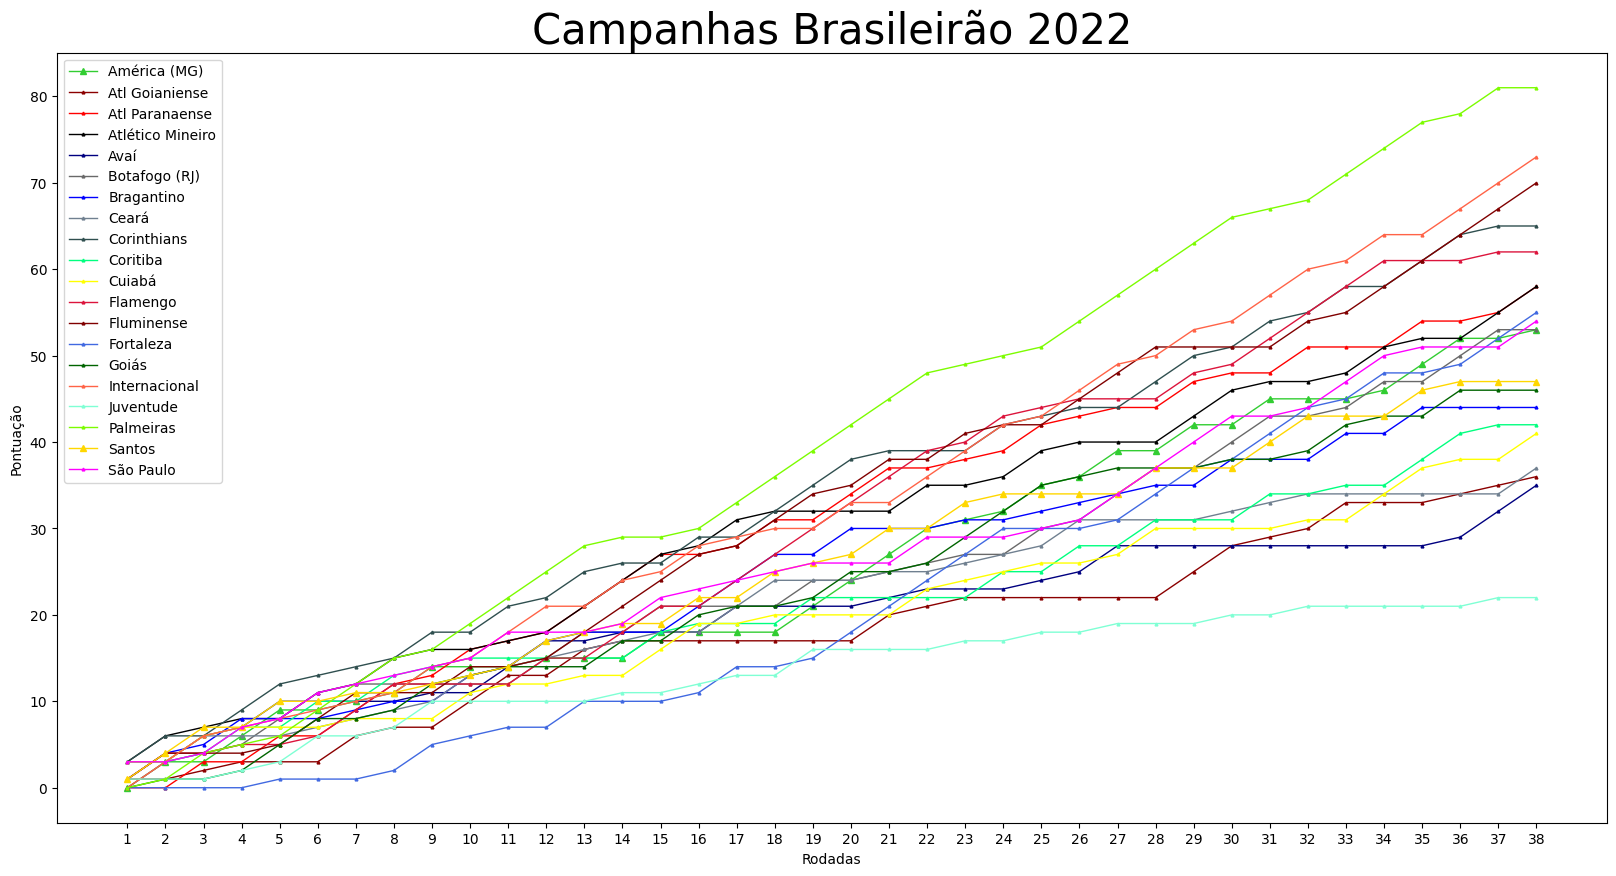

<Figure size 640x480 with 0 Axes>

In [181]:
plt.figure(figsize=(20,10))
plt.plot(x, y, c= 'limegreen', ls='-', lw='1', marker ='^', ms=5, fillstyle = 'full', label = 'América (MG)')
plt.plot(x, y1, c= 'darkred', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Atl Goianiense')
plt.plot(x, y2, c= 'red', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Atl Paranaense')
plt.plot(x, y3, c= 'black', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Atlético Mineiro')
plt.plot(x, y4, c= 'navy', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Avaí')
plt.plot(x, y5, c= 'dimgrey', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Botafogo (RJ)')
plt.plot(x, y6, c= 'blue', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Bragantino')
plt.plot(x, y7, c= 'slategrey', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Ceará')
plt.plot(x, y8, c= 'darkslategrey', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Corinthians')
plt.plot(x, y9, c= 'springgreen', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Coritiba')
plt.plot(x, y10, c= 'yellow', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Cuiabá')
plt.plot(x, y11, c= 'crimson', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Flamengo')
plt.plot(x, y12, c= 'maroon', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Fluminense')
plt.plot(x, y13, c= 'royalblue', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Fortaleza')
plt.plot(x, y14, c= 'darkgreen', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Goiás')
plt.plot(x, y15, c= 'tomato', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Internacional')
plt.plot(x, y16, c= 'aquamarine', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Juventude')
plt.plot(x, y17, c= 'lawngreen', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'Palmeiras')
plt.plot(x, y18, c= 'gold', ls='-', lw='1', marker ='^', ms=5, fillstyle = 'full', label = 'Santos')
plt.plot(x, y19, c= 'magenta', ls='-', lw='1', marker ='^', ms=2, fillstyle = 'full', label = 'São Paulo')


eixoX = df3['Rodada'].unique()
plt.xticks([1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38], eixoX)

plt.legend()

plt.title('Campanhas Brasileirão 2022', size=30)
plt.xlabel('Rodadas')
plt.ylabel('Pontuação')
plt.show()
plt.savefig("campanhas_2022.png")

### Contrução de Gráficos - MELHOR ATAQUE

In [182]:
df11 = pd.DataFrame(mydata4[['Rodada', 'Home', 'Placar_Home']])
df22 = pd.DataFrame(mydata4[['Rodada', 'Away', 'Placar_Away']])

df11 = df11.rename(columns={'Rodada': 'Rodada', 'Home': 'Time', 'Placar_Home': 'Gols_Feitos'})
df22 = df22.rename(columns={'Rodada': 'Rodada', 'Away': 'Time', 'Placar_Away': 'Gols_Feitos'})



df33 = pd.concat([df11, df22], axis=0)
df33.dtypes

Rodada         object
Time           object
Gols_Feitos    object
dtype: object

In [183]:
df33['Gols_Feitos'] = df33['Gols_Feitos'].astype(int)
df44 = df33.groupby(['Time'])['Gols_Feitos'].sum()
df55 = pd.DataFrame(df44)
df55

,Gols_Feitos
Time,
América (MG),40
Atl Goianiense,39
Atl Paranaense,48
Atlético Mineiro,45
Avaí,34
Botafogo (RJ),41
Bragantino,49
Ceará,34
Corinthians,44


In [184]:
df55_sorted = df55.sort_values('Gols_Feitos')
df55_sorted

,Gols_Feitos
Time,
Juventude,29
Cuiabá,31
Avaí,34
Ceará,34
Coritiba,39
Atl Goianiense,39
Goiás,40
América (MG),40
Botafogo (RJ),41


In [185]:
df55_sorted.reset_index(inplace=True)
df55_sorted

,Time,Gols_Feitos
0,Juventude,29
1,Cuiabá,31
2,Avaí,34
3,Ceará,34
4,Coritiba,39
5,Atl Goianiense,39
6,Goiás,40
7,América (MG),40
8,Botafogo (RJ),41
9,Corinthians,44


In [186]:
# Export to csv
df55_sorted.to_csv('df55_sorted.csv', index=False)

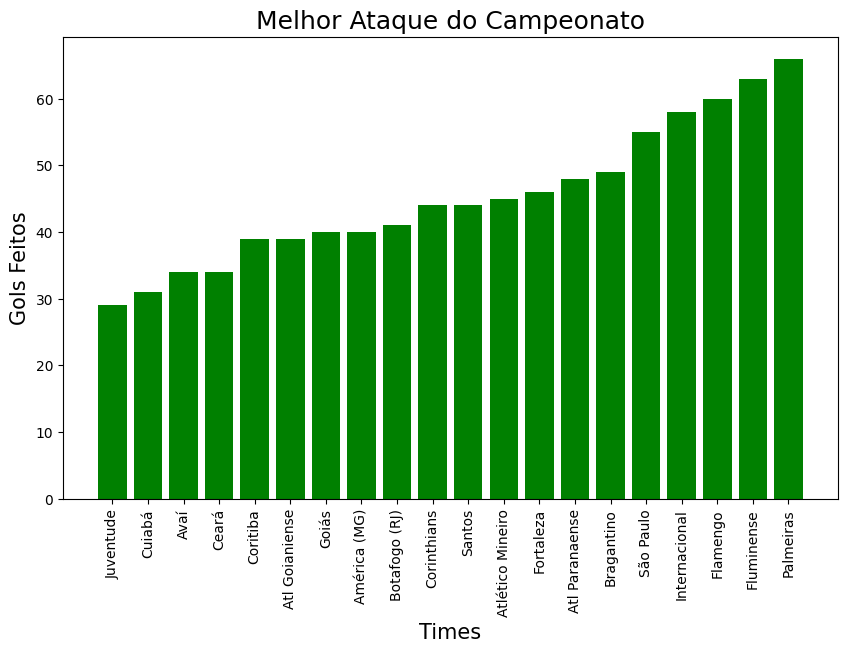

In [187]:
plt.figure(figsize=(10,6))
# bar plot with matplotlib
plt.bar('Time', 'Gols_Feitos',data=df55_sorted ,color=['green'])
plt.xlabel("Times", size=15)
plt.ylabel("Gols Feitos", size=15)
plt.xticks(rotation=90)
plt.title("Melhor Ataque do Campeonato", size=18)
plt.show()

### Contrução de Gráficos - MELHOR DEFESA

In [188]:
dfaa = pd.DataFrame(mydata4[['Rodada', 'Home', 'Placar_Away']])
dfbb = pd.DataFrame(mydata4[['Rodada', 'Away', 'Placar_Home']])

dfaa = dfaa.rename(columns={'Rodada': 'Rodada', 'Home': 'Time', 'Placar_Away': 'Gols_Sofridos'})
dfbb = dfbb.rename(columns={'Rodada': 'Rodada', 'Away': 'Time', 'Placar_Home': 'Gols_Sofridos'})



dfcc = pd.concat([dfaa, dfbb], axis=0)
dfcc

,Rodada,Time,Gols_Sofridos
0,1,Fluminense,0
1,1,Atl Goianiense,1
2,1,Coritiba,0
3,1,Atlético Mineiro,0
4,1,Botafogo (RJ),3
...,...,...,...
417,38,Fluminense,0
418,38,Atl Goianiense,1
419,38,São Paulo,0
420,38,Palmeiras,3


In [189]:
dfcc['Gols_Sofridos'] = dfcc['Gols_Sofridos'].astype(int)
dfdd = dfcc.groupby(['Time'])['Gols_Sofridos'].sum()
dfee = pd.DataFrame(dfdd)
dfee

,Gols_Sofridos
Time,
América (MG),40
Atl Goianiense,57
Atl Paranaense,48
Atlético Mineiro,37
Avaí,60
Botafogo (RJ),43
Bragantino,59
Ceará,41
Corinthians,36


In [190]:
dfee_sorted = dfee.sort_values('Gols_Sofridos')
dfee_sorted

,Gols_Sofridos
Time,
Palmeiras,27
Internacional,31
Corinthians,36
Atlético Mineiro,37
Fortaleza,39
Flamengo,39
América (MG),40
Fluminense,41
Ceará,41


In [191]:
dfee_sorted.reset_index(inplace=True)
dfee_sorted

,Time,Gols_Sofridos
0,Palmeiras,27
1,Internacional,31
2,Corinthians,36
3,Atlético Mineiro,37
4,Fortaleza,39
5,Flamengo,39
6,América (MG),40
7,Fluminense,41
8,Ceará,41
9,Santos,41


In [192]:
# Export to csv
dfee_sorted.to_csv('dfee_sorted.csv', index=False)

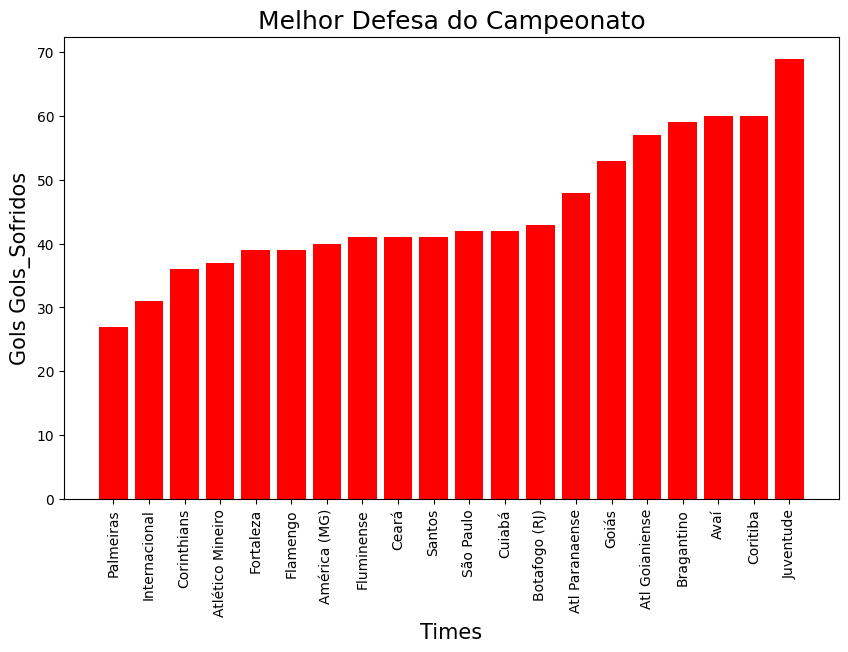

In [193]:
plt.figure(figsize=(10,6))
# bar plot with matplotlib
plt.bar('Time', 'Gols_Sofridos',data=dfee_sorted ,color=['red'])
plt.xlabel("Times", size=15)
plt.ylabel("Gols Gols_Sofridos", size=15)
plt.xticks(rotation=90)
plt.title("Melhor Defesa do Campeonato", size=18)
plt.show()

### Contrução de Gráficos - ANALISE REFEREE

In [194]:
## Marcando a Pontuação para Cada Time e Rodada

conditions3 = [
    (mydata4['Placar_Home'] > mydata4['Placar_Away']),
    (mydata4['Placar_Home'] < mydata4['Placar_Away']),
    (mydata4['Placar_Home'] == mydata4['Placar_Away'])
]

choices3 = ['VITORIA_MANDANTE','VITORIA_VISITANTE','EMPATE']

mydata4['RESULT_FINAL'] = np.select(conditions3, choices3, default=0)
mydata4

C:\Users\caiov\AppData\Local\Temp\ipykernel_7320\3474908134.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata4['RESULT_FINAL'] = np.select(conditions3, choices3, default=0)


,Day,Date,Time,Home,xG,Score,xG,Away,Attendance,Venue,Referee,Rodada,Placar_Home,Placar_Away,Result1,Result2,RESULT_FINAL
0,Sat,2022-04-09,16:30,Fluminense,1.6,0–0,0.1,Santos,"22,855",Estadio Jornalista Mário Filho,Anderson Daronco,1,0,0,1,1,EMPATE
1,Sat,2022-04-09,19:00,Atl Goianiense,1.4,1–1,1.2,Flamengo,"10,496",Estádio Antônio Accioly,Braulio da Silva Machado,1,1,1,1,1,EMPATE
2,Sun,2022-04-10,11:00,Coritiba,1.7,3–0,0.4,Goiás,"17,788",Estádio Major Antônio Couto Pereira,Raphael Claus,1,3,0,3,0,VITORIA_MANDANTE
3,Sun,2022-04-10,16:00,Atlético Mineiro,1.9,2–0,0.6,Internacional,"37,531",Estádio Governador Magalhães Pinto,Bruno Arleu de Araujo,1,2,0,3,0,VITORIA_MANDANTE
4,Sun,2022-04-10,16:00,Botafogo (RJ),1.5,1–3,2.1,Corinthians,"36,898",Estádio Nilton Santos,Wilton Sampaio,1,1,3,0,3,VITORIA_VISITANTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Sun,2022-11-13,16:00,Bragantino,0.9,0–1,0.6,Fluminense,,Estádio Nabi Abi Chedid,Bruno Arleu de Araujo,38,0,1,0,3,VITORIA_VISITANTE
418,Sun,2022-11-13,16:00,América (MG),2.1,1–1,0.5,Atl Goianiense,,Estádio Raimundo Sampaio,Leandro Pedro Vuaden,38,1,1,1,1,EMPATE
419,Sun,2022-11-13,16:00,Goiás,0.2,0–4,1.7,São Paulo,,Estádio de Hailé Pinheiro,Marcelo de Lima Henrique,38,0,4,0,3,VITORIA_VISITANTE
420,Sun,2022-11-13,16:00,Internacional,1.4,3–0,1.3,Palmeiras,,Estádio José Pinheiro Borba,Bruno Arleu de Araujo,38,3,0,3,0,VITORIA_MANDANTE


In [195]:
# Export to csv
mydata4.to_csv('mydata4.csv', index=False)

In [196]:
dfrr1 = pd.DataFrame(mydata4[['Rodada', 'Referee', 'RESULT_FINAL']])
dfrr1

,Rodada,Referee,RESULT_FINAL
0,1,Anderson Daronco,EMPATE
1,1,Braulio da Silva Machado,EMPATE
2,1,Raphael Claus,VITORIA_MANDANTE
3,1,Bruno Arleu de Araujo,VITORIA_MANDANTE
4,1,Wilton Sampaio,VITORIA_VISITANTE
...,...,...,...
417,38,Bruno Arleu de Araujo,VITORIA_VISITANTE
418,38,Leandro Pedro Vuaden,EMPATE
419,38,Marcelo de Lima Henrique,VITORIA_VISITANTE
420,38,Bruno Arleu de Araujo,VITORIA_MANDANTE


In [197]:
# Export to csv
dfrr1.to_csv('dfrr1.csv', index=False)

In [198]:
dfrr_empate = dfrr1[dfrr1['RESULT_FINAL'] == 'EMPATE']
dfrr_win_casa = dfrr1[dfrr1['RESULT_FINAL'] == 'VITORIA_MANDANTE']
dfrr_win_visit = dfrr1[dfrr1['RESULT_FINAL'] == 'VITORIA_VISITANTE']

In [199]:
dfrr_empate2 = dfrr_empate.groupby(['Referee'])['RESULT_FINAL'].count()
dfrr_win_casa2 = dfrr_win_casa.groupby(['Referee'])['RESULT_FINAL'].count()
dfrr_win_visit2 = dfrr_win_visit.groupby(['Referee'])['RESULT_FINAL'].count()

In [200]:
dfrr_empate2

Referee
Anderson Daronco                    7
André Luiz de Freitas Castro        3
Braulio da Silva Machado           11
Bruno Arleu de Araujo               9
Caio Max Augusto Vieira             3
Diego Pombo Lopez                   1
Douglas Marques das Flores          3
Dyorgines José Padovani Andrade     1
Edina Alves Batista                 1
Felipe Fernandes de Lima            1
Flavio Rodrigues De Souza           7
Jean Pierre Goncalves Lima          4
Jose Mendonca da Silva Junior       2
Leandro Pedro Vuaden                2
Luiz Flávio de Oliveira             4
Marcelo de Lima Henrique            5
Paulo Cesar Zanovelli da Silva      2
Paulo Roberto Alves Júnior          1
Rafael Rodrigo Klein                1
Ramon Abatti Abel                   9
Raphael Claus                       5
Rodolpho Toski Marques              2
Rodrigo José Pereira de Lima        1
Savio Pereira                       4
Vinicius Gonçalves Dias Araujo      3
Wagner do Nascimento Magalhães      8
Wilt

In [201]:
dfrr_empate2_s = dfrr_empate2.sort_values()
dfrr_win_casa2_s = dfrr_win_casa2.sort_values()
dfrr_win_visit2 = dfrr_win_visit2.sort_values()

In [202]:
dfrr_empate2_s = pd.DataFrame(dfrr_empate2_s)
dfrr_empate2_s.reset_index(inplace=True)
dfrr_empate2_s

dfrr_win_casa2_s = pd.DataFrame(dfrr_win_casa2_s)
dfrr_win_casa2_s.reset_index(inplace=True)
dfrr_win_casa2_s

dfrr_win_visit2 = pd.DataFrame(dfrr_win_visit2)
dfrr_win_visit2.reset_index(inplace=True)
dfrr_win_visit2

,Referee,RESULT_FINAL
0,Dyorgines José Padovani Andrade,1
1,Felipe Fernandes de Lima,1
2,Rodolpho Toski Marques,1
3,Maguielson Lima Barbosa,1
4,Paulo Henrique Schleinch Vollkopf,1
5,Vinicius Gonçalves Dias Araujo,2
6,Caio Max Augusto Vieira,2
7,Douglas Marques das Flores,2
8,Savio Pereira,2
9,Bruno Arleu de Araujo,3


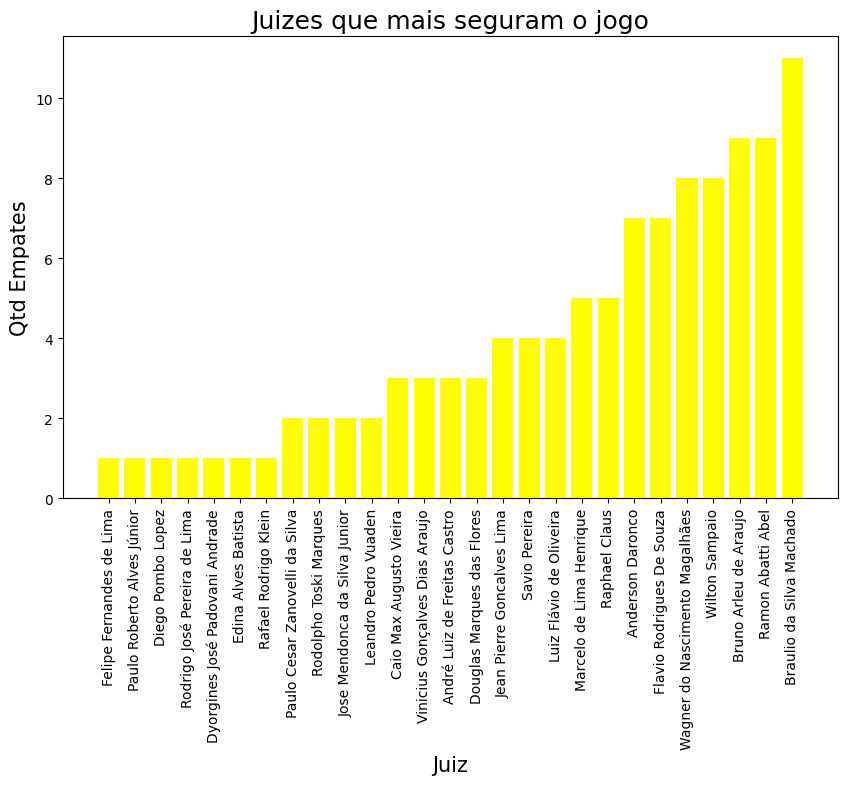

In [203]:
plt.figure(figsize=(10,6))
# bar plot with matplotlib
plt.bar('Referee', 'RESULT_FINAL',data=dfrr_empate2_s ,color=['yellow'])
plt.xlabel("Juiz", size=15)
plt.ylabel("Qtd Empates", size=15)
plt.xticks(rotation=90)
plt.title("Juizes que mais seguram o jogo", size=18)
plt.show()

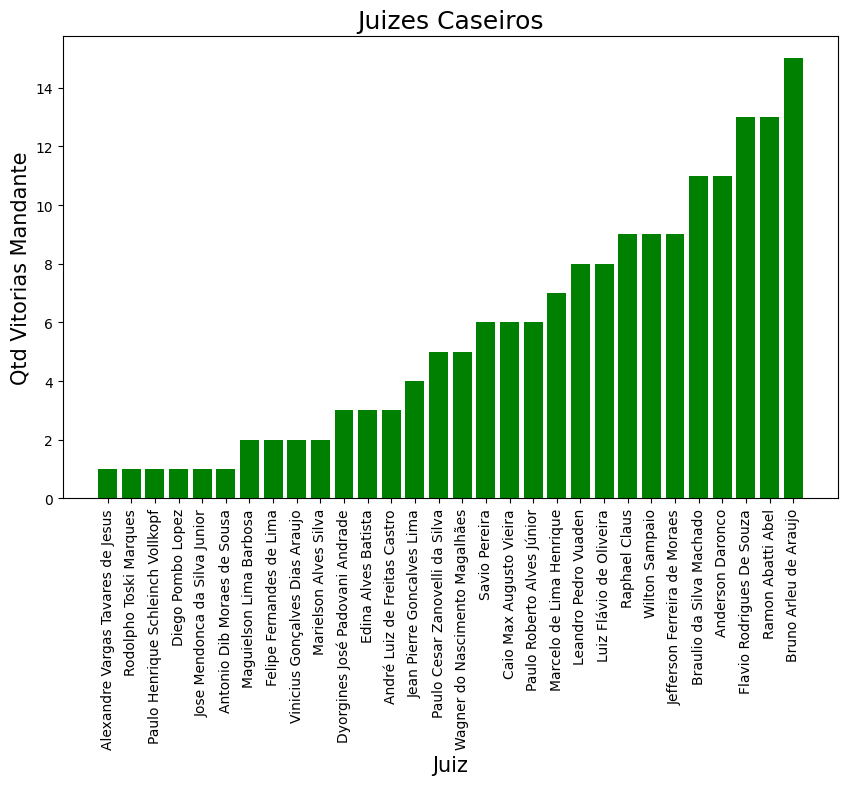

In [204]:
plt.figure(figsize=(10,6))
# bar plot with matplotlib
plt.bar('Referee', 'RESULT_FINAL',data=dfrr_win_casa2_s ,color=['green'])
plt.xlabel("Juiz", size=15)
plt.ylabel("Qtd Vitorias Mandante", size=15)
plt.xticks(rotation=90)
plt.title("Juizes Caseiros", size=18)
plt.show()

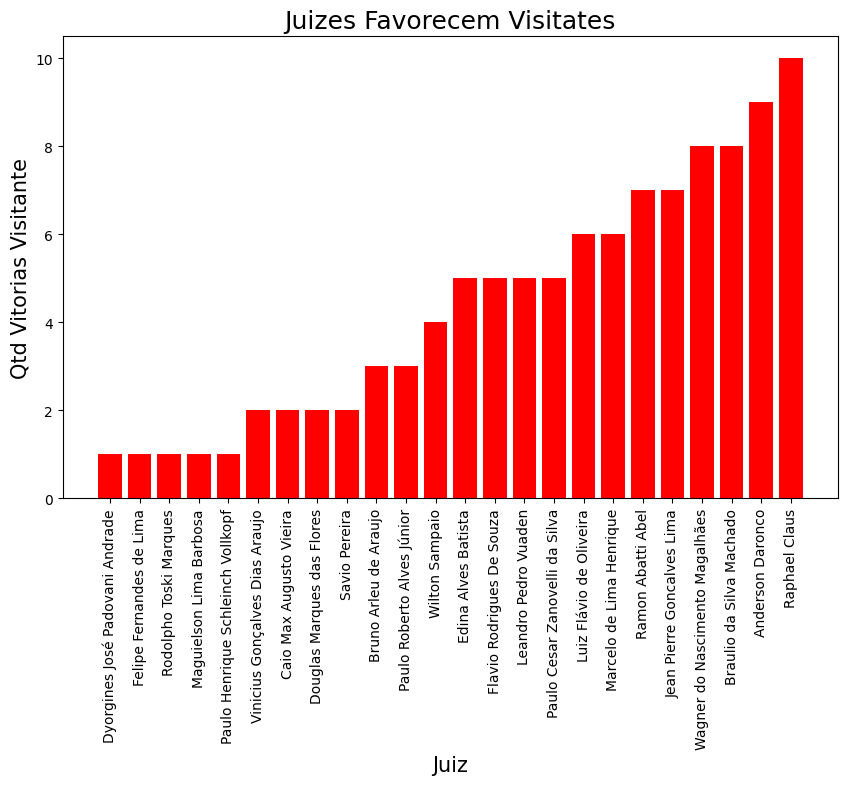

In [205]:
plt.figure(figsize=(10,6))
# bar plot with matplotlib
plt.bar('Referee', 'RESULT_FINAL',data=dfrr_win_visit2 ,color=['red'])
plt.xlabel("Juiz", size=15)
plt.ylabel("Qtd Vitorias Visitante", size=15)
plt.xticks(rotation=90)
plt.title("Juizes Favorecem Visitates", size=18)
plt.show()

### Teste de Hipotese - TORCIDA GANHA JOGO?

In [206]:
from scipy.stats import ranksums
import seaborn as sns

In [207]:
dfx = pd.DataFrame(mydata4[['Attendance', 'RESULT_FINAL']])

## FILTRANDO NÃO VAZIO
filtro1  = dfx['Attendance'] != ''
dfx2 = dfx[filtro1]
dfx2.count()

Attendance      326
RESULT_FINAL    326
dtype: int64

In [208]:
dfx2.dtypes

Attendance      object
RESULT_FINAL    object
dtype: object

In [209]:
# Replace the commas in the 'col' column
dfx2['Attendance'] = dfx2['Attendance'].str.replace(',', '')
dfx2['Attendance'] = dfx2['Attendance'].astype(int)
dfx2

C:\Users\caiov\AppData\Local\Temp\ipykernel_7320\2333955254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx2['Attendance'] = dfx2['Attendance'].str.replace(',', '')
C:\Users\caiov\AppData\Local\Temp\ipykernel_7320\2333955254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx2['Attendance'] = dfx2['Attendance'].astype(int)


,Attendance,RESULT_FINAL
0,22855,EMPATE
1,10496,EMPATE
2,17788,VITORIA_MANDANTE
3,37531,VITORIA_MANDANTE
4,36898,VITORIA_VISITANTE
...,...,...
380,16365,VITORIA_VISITANTE
394,41335,VITORIA_MANDANTE
395,44810,EMPATE
399,31160,VITORIA_VISITANTE


<Figure size 1000x600 with 0 Axes>

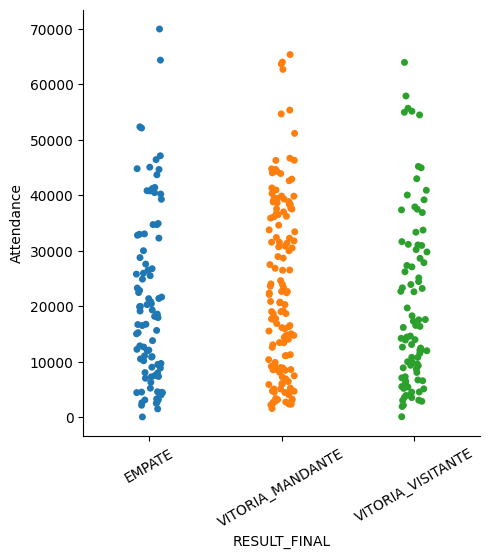

In [210]:
plt.figure(figsize=(10,6))
g = sns.catplot(x='RESULT_FINAL', y='Attendance',data=dfx2)
g.set_xticklabels(rotation=30)
plt.show()

In [211]:
## HNull - Jogos com bom Attendence favorecem vitoria
## HAlt - O Attendence não interfere no resultado do jogo

In [212]:
Publico = dfx2['Attendance']
Resultado_Favoravel = dfx2['RESULT_FINAL']

r = ranksums('Publico', 'Resultado_Favoravel')

print('O valor do p-value é {}'.format(r.pvalue))

C:\Users\caiov\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


O valor do p-value é 0.31731050786291415


In [213]:
## A diferença é insignificante (Pvalue > 0,05)
## Desta forma descartamos a hipótese alternativa
## Se mantém a hipótese nula (Jogos com bom Attendence favorecem vitoria)

In [214]:
mydata4

,Day,Date,Time,Home,xG,Score,xG,Away,Attendance,Venue,Referee,Rodada,Placar_Home,Placar_Away,Result1,Result2,RESULT_FINAL
0,Sat,2022-04-09,16:30,Fluminense,1.6,0–0,0.1,Santos,"22,855",Estadio Jornalista Mário Filho,Anderson Daronco,1,0,0,1,1,EMPATE
1,Sat,2022-04-09,19:00,Atl Goianiense,1.4,1–1,1.2,Flamengo,"10,496",Estádio Antônio Accioly,Braulio da Silva Machado,1,1,1,1,1,EMPATE
2,Sun,2022-04-10,11:00,Coritiba,1.7,3–0,0.4,Goiás,"17,788",Estádio Major Antônio Couto Pereira,Raphael Claus,1,3,0,3,0,VITORIA_MANDANTE
3,Sun,2022-04-10,16:00,Atlético Mineiro,1.9,2–0,0.6,Internacional,"37,531",Estádio Governador Magalhães Pinto,Bruno Arleu de Araujo,1,2,0,3,0,VITORIA_MANDANTE
4,Sun,2022-04-10,16:00,Botafogo (RJ),1.5,1–3,2.1,Corinthians,"36,898",Estádio Nilton Santos,Wilton Sampaio,1,1,3,0,3,VITORIA_VISITANTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Sun,2022-11-13,16:00,Bragantino,0.9,0–1,0.6,Fluminense,,Estádio Nabi Abi Chedid,Bruno Arleu de Araujo,38,0,1,0,3,VITORIA_VISITANTE
418,Sun,2022-11-13,16:00,América (MG),2.1,1–1,0.5,Atl Goianiense,,Estádio Raimundo Sampaio,Leandro Pedro Vuaden,38,1,1,1,1,EMPATE
419,Sun,2022-11-13,16:00,Goiás,0.2,0–4,1.7,São Paulo,,Estádio de Hailé Pinheiro,Marcelo de Lima Henrique,38,0,4,0,3,VITORIA_VISITANTE
420,Sun,2022-11-13,16:00,Internacional,1.4,3–0,1.3,Palmeiras,,Estádio José Pinheiro Borba,Bruno Arleu de Araujo,38,3,0,3,0,VITORIA_MANDANTE
